In [1]:
from wilds import get_dataset
from wilds.common.data_loaders import get_train_loader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd
import torch

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from unlabeled_extrapolation.datasets import fmow
from unlabeled_extrapolation.models import imnet_models

import importlib
importlib.reload(fmow)
importlib.reload(imnet_models)

<module 'unlabeled_extrapolation.models.imnet_models' from '/juice/scr/ananya/cifar_experiments/unlabeled_extrapolation/unlabeled_extrapolation/models/imnet_models.py'>

In [13]:
transform = transforms.Compose([transforms.ToTensor()])
dataset = fmow.Fmow(regions=[4], root='/u/scr/nlp/wilds/data/', split='val', transform=transform)

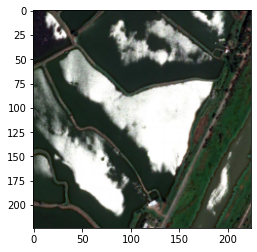

In [4]:
plt.imshow(dataset[1][0].permute(1,2,0))

In [20]:
model = imnet_models.WildsVisionModel(
    name='densenet121', pretrained=True,
    checkpoint_path='/sailhome/ananya/scratch/cifar_experiments/wilds/logs/fmow_seed:0_epoch:best_model.pth')
model.cuda()

WildsVisionModel(
  (_model): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, mome

In [7]:
model.new_last_layer(100)

In [8]:
getattr(model._model, 'classifier')

Linear(in_features=1024, out_features=100, bias=True)

In [14]:
print(len(dataset))

251


In [50]:
for split in ['val', 'ood_val']:
    print(split)
    for i in range(5):
        print(i)
        dataset = fmow.Fmow(regions=[i], root='/u/scr/nlp/wilds/data/', split=split, transform=transform)
        loader = torch.utils.data.DataLoader(dataset, batch_size=2,shuffle=True, num_workers=1)
#         dataset = get_dataset(dataset='fmow', download=False, root_dir='/u/scr/nlp/wilds/data/')
#         train_data = dataset.get_subset(split, transform=transforms.Compose([transforms.ToTensor()]))
#         loader = get_train_loader('standard', train_data, batch_size=64)
        with torch.no_grad():
            for data in loader:
                print('hi')
                images, labels = data
                print(images.shape)
                images = torch.clone(images.detach()).cuda()
                outputs = model(images)



val
0
hi
torch.Size([2, 3, 224, 224])
hi
torch.Size([2, 3, 224, 224])


RuntimeError: cuDNN error: CUDNN_STATUS_INTERNAL_ERROR
You can try to repro this exception using the following code snippet. If that doesn't trigger the error, please include your original repro script when reporting this issue.

import torch
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.allow_tf32 = True
data = torch.randn([2, 128, 28, 28], dtype=torch.float, device='cuda', requires_grad=True)
net = torch.nn.Conv2d(128, 128, kernel_size=[1, 1], padding=[0, 0], stride=[1, 1], dilation=[1, 1], groups=1)
net = net.cuda().float()
out = net(data)
out.backward(torch.randn_like(out))
torch.cuda.synchronize()

ConvolutionParams 
    data_type = CUDNN_DATA_FLOAT
    padding = [0, 0, 0]
    stride = [1, 1, 0]
    dilation = [1, 1, 0]
    groups = 1
    deterministic = false
    allow_tf32 = true
input: TensorDescriptor 0x55e25b47c120
    type = CUDNN_DATA_FLOAT
    nbDims = 4
    dimA = 2, 128, 28, 28, 
    strideA = 100352, 784, 28, 1, 
output: TensorDescriptor 0x55e25fe9f2e0
    type = CUDNN_DATA_FLOAT
    nbDims = 4
    dimA = 2, 128, 28, 28, 
    strideA = 100352, 784, 28, 1, 
weight: FilterDescriptor 0x55e25a7034c0
    type = CUDNN_DATA_FLOAT
    tensor_format = CUDNN_TENSOR_NCHW
    nbDims = 4
    dimA = 128, 128, 1, 1, 
Pointer addresses: 
    input: 0x2305e24000
    output: 0x2305f60000
    weight: 0x23017d8a00
Forward algorithm: 5


In [51]:
model

WildsVisionModel(
  (_model): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, mome

In [22]:
print(f'torch version: {torch.__version__}')
print(f'torch cuda version: {torch.version.cuda}')
print(f'cuda is available: {torch.cuda.is_available()}')
print(f'cuda device count: {torch.cuda.device_count()}')


torch version: 1.8.1+cu111
torch cuda version: 11.1
cuda is available: True
cuda device count: 1


# Old stuff using the raw wilds datasets 

In [29]:
dataset = get_dataset(dataset='fmow', download=False, root_dir='/u/scr/nlp/wilds/data/')

In [31]:
dataset._split_dict

{'train': 0, 'val': 1, 'id_test': 2, 'ood_val': 3, 'test': 4}

In [33]:
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
train_data = dataset.get_subset('val', transform=transforms.Compose([transforms.Resize((448,448)),transforms.ToTensor()]))

In [5]:
dataset.split_dict

{'train': 0, 'val': 1, 'id_test': 2, 'ood_val': 3, 'test': 4}

In [34]:
train_data.dataset.metadata

,split,img_filename,img_path,spatial_reference,epsg,category,visible,img_width,img_height,country_code,cloud_cover,timestamp,lat,lon,region,y,year
0,train,tunnel_opening_370_6_rgb.jpg,train/tunnel_opening/tunnel_opening_370/tunnel...,GCS_WGS_1984,4326,tunnel_opening,True,1359,1222,CHN,0,2017-04-12T04:14:15Z,26.604456,101.733373,0,57,15.0
1,train,tunnel_opening_370_1_rgb.jpg,train/tunnel_opening/tunnel_opening_370/tunnel...,GCS_WGS_1984,4326,tunnel_opening,True,900,809,CHN,0,2017-01-30T04:18:04Z,26.604456,101.733373,0,57,15.0
2,train,tunnel_opening_370_0_rgb.jpg,train/tunnel_opening/tunnel_opening_370/tunnel...,GCS_WGS_1984,4326,tunnel_opening,True,1058,951,CHN,1,2015-02-20T04:11:50Z,26.604456,101.733373,0,57,13.0
3,train,tunnel_opening_370_3_rgb.jpg,train/tunnel_opening/tunnel_opening_370/tunnel...,GCS_WGS_1984,4326,tunnel_opening,True,1568,1409,CHN,11,2015-11-23T04:10:38Z,26.604456,101.733373,0,57,13.0
4,train,tunnel_opening_370_4_rgb.jpg,train/tunnel_opening/tunnel_opening_370/tunnel...,GCS_WGS_1984,4326,tunnel_opening,True,1624,1460,CHN,0,2016-04-04T04:12:15Z,26.604456,101.733373,0,57,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523841,seq,burial_site_82_1_rgb.jpg,seq/0010209/0010209_1_rgb.jpg,GCS_WGS_1984,4326,burial_site,True,832,507,NLD,1,2013-05-28T11:22:02Z,52.646049,5.035879,1,8,11.0
523842,seq,burial_site_150_0_rgb.jpg,seq/0004147/0004147_0_rgb.jpg,GCS_WGS_1984,4326,burial_site,True,875,716,JPN,0,2015-03-31T01:47:42Z,35.423879,139.378550,0,8,13.0
523843,seq,burial_site_150_2_rgb.jpg,seq/0004147/0004147_2_rgb.jpg,GCS_WGS_1984,4326,burial_site,True,973,797,JPN,4,2016-01-13T01:28:04Z,35.423879,139.378550,0,8,14.0
523844,seq,burial_site_127_6_rgb.jpg,seq/0007058/0007058_6_rgb.jpg,GCS_WGS_1984,4326,burial_site,True,678,443,FRA,20,2009-10-27T10:47:30Z,49.347681,6.135579,1,8,7.0


In [ ]:
metadata = pd.read_csv(dataset.root / 'rgb_metadata.csv')
print(metadata['country_code'])

In [ ]:
country_codes_df = pd.read_csv(dataset.root / 'country_code_mapping.csv')

In [ ]:
countrycode_to_region = {k: v for k, v in zip(country_codes_df['alpha-3'], country_codes_df['region'])}
regions = [countrycode_to_region.get(code, 'Other') for code in metadata['country_code'].to_list()]
all_countries = metadata['country_code']
metadata['region'] = regions
all_regions = list(metadata['region'].unique())
region_to_region_idx = {region: i for i, region in enumerate(all_regions)}
region_to_region_idx

In [35]:
train_data[0]

(tensor([[[0.1843, 0.1765, 0.1647,  ..., 0.1059, 0.0549, 0.0314],
          [0.1804, 0.1725, 0.1647,  ..., 0.1020, 0.0549, 0.0314],
          [0.1725, 0.1686, 0.1608,  ..., 0.0902, 0.0510, 0.0314],
          ...,
          [0.0275, 0.0314, 0.0353,  ..., 0.3608, 0.4039, 0.4196],
          [0.0314, 0.0353, 0.0392,  ..., 0.4078, 0.4471, 0.4627],
          [0.0314, 0.0353, 0.0392,  ..., 0.4314, 0.4667, 0.4824]],
 
         [[0.1843, 0.1765, 0.1569,  ..., 0.1451, 0.0667, 0.0275],
          [0.1804, 0.1725, 0.1569,  ..., 0.1294, 0.0588, 0.0235],
          [0.1686, 0.1647, 0.1529,  ..., 0.0980, 0.0392, 0.0118],
          ...,
          [0.0196, 0.0196, 0.0196,  ..., 0.3333, 0.3961, 0.4275],
          [0.0157, 0.0157, 0.0157,  ..., 0.4000, 0.4667, 0.4980],
          [0.0157, 0.0157, 0.0157,  ..., 0.4353, 0.5020, 0.5333]],
 
         [[0.2314, 0.2235, 0.2118,  ..., 0.0980, 0.0471, 0.0196],
          [0.2275, 0.2196, 0.2118,  ..., 0.0863, 0.0392, 0.0157],
          [0.2196, 0.2157, 0.2078,  ...,

In [14]:
dataset.original_resolution

AttributeError: 'Fmow' object has no attribute 'original_resolution'